In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load Data

In [65]:
data = pd.read_csv("Batch size experiment.csv")
data_times = pd.read_csv("Batch size experiment times.csv")
other_data = pd.read_csv("Batch size experiment_other-data.csv")

(3960, 12)


,wins,wins_without_guess,time_elapsed,samples_considered,samples_with_solutions,difficulty,sample_size,use_num_mines_constraint,first_click_pos,first_click_is_zero,parameters_id,batch_size
0,10,10,0.390595,27,27,Beginner (9x9),11x11,True,"(3, 3)",True,1,10
1,10,9,0.453089,39,37,Beginner (9x9),11x11,True,"(3, 3)",True,1,10
2,9,9,0.499958,32,31,Beginner (9x9),11x11,True,"(3, 3)",True,1,10
3,8,8,0.609323,39,37,Beginner (9x9),11x11,True,"(3, 3)",True,1,10
4,10,10,0.421949,31,31,Beginner (9x9),11x11,True,"(3, 3)",True,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
3955,177,72,1615.032455,9635,8526,Expert (16x30),18x32,True,"(3, 3)",True,3,500
3956,160,67,1440.321970,9708,8653,Expert (16x30),18x32,True,"(3, 3)",True,3,500
3957,186,78,1082.275299,9738,8742,Expert (16x30),18x32,True,"(3, 3)",True,3,500
3958,193,79,1199.917265,9856,8778,Expert (16x30),18x32,True,"(3, 3)",True,3,500


In [158]:
print(data.shape)
data

(3960, 12)


,wins,wins_without_guess,time_elapsed,samples_considered,samples_with_solutions,difficulty,sample_size,use_num_mines_constraint,first_click_pos,first_click_is_zero,parameters_id,batch_size
0,10,10,0.390595,27,27,Beginner (9x9),11x11,True,"(3, 3)",True,1,10
1,10,9,0.453089,39,37,Beginner (9x9),11x11,True,"(3, 3)",True,1,10
2,9,9,0.499958,32,31,Beginner (9x9),11x11,True,"(3, 3)",True,1,10
3,8,8,0.609323,39,37,Beginner (9x9),11x11,True,"(3, 3)",True,1,10
4,10,10,0.421949,31,31,Beginner (9x9),11x11,True,"(3, 3)",True,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
3955,177,72,1615.032455,9635,8526,Expert (16x30),18x32,True,"(3, 3)",True,3,500
3956,160,67,1440.321970,9708,8653,Expert (16x30),18x32,True,"(3, 3)",True,3,500
3957,186,78,1082.275299,9738,8742,Expert (16x30),18x32,True,"(3, 3)",True,3,500
3958,193,79,1199.917265,9856,8778,Expert (16x30),18x32,True,"(3, 3)",True,3,500


In [132]:
print(data_times.shape)
data_times

(6, 3)


,batch_size,time_elapsed,avg_per_game
0,10,2584.907562,0.344654
1,25,2604.046351,0.347206
2,50,2651.810141,0.353575
3,100,2682.542370,0.357672
4,250,2725.840438,0.363445
5,500,2970.516882,0.396069


In [67]:
print(other_data.shape)
other_data

(1, 8)


,sample_size,use_num_mines_constraint,first_click_pos,num_games,verbose,visualise,agent_seed,run_seed
0,NaN,True,"(3, 3)",7500,False,False,20,2020


# Analyse

In [124]:
num_games = other_data['num_games'][0]
data_times['avg_per_game'] = data_times['time_elapsed'] / num_games
data_times

,batch_size,time_elapsed,avg_per_game
0,10,2584.907562,0.344654
1,25,2604.046351,0.347206
2,50,2651.810141,0.353575
3,100,2682.542370,0.357672
4,250,2725.840438,0.363445
5,500,2970.516882,0.396069


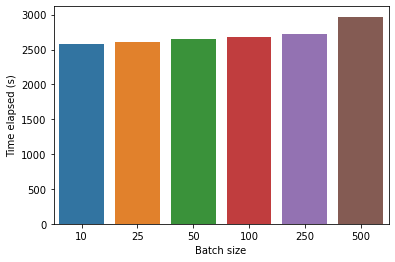

In [76]:
ax = sns.barplot(x='batch_size', y='time_elapsed', data=data_times)
ax.set_xlabel('Batch size')
ax.set_ylabel('Time elapsed (s)')
plt.show()

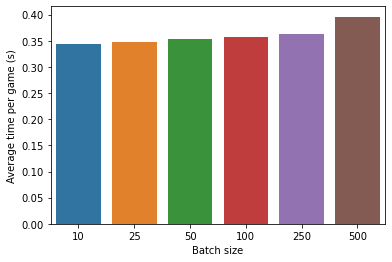

In [74]:
ax = sns.barplot(x='batch_size', y='avg_per_game', data=data_times)
ax.set_xlabel('Batch size')
ax.set_ylabel('Average time per game (s)')
plt.show()

In [200]:
overall_time = sum(data_times['time_elapsed'])
hours = overall_time / (60**2)
print(f"overall time: {overall_time} (s)\t{hours} (hrs)")

overall time: 16219.663744449615 (s)	4.505462151236005 (hrs)


In [186]:
# Get cumulative time elapsed and num games played for each pair of 
# batch size & difficulty
df = data.loc[:, ('batch_size', 'difficulty')]
df['cumsum_time_elapsed'] = data.groupby(by=['batch_size', 'difficulty'])['time_elapsed'].cumsum()
df['num_games'] = df['batch_size'] * (data.groupby(['batch_size', 'difficulty']).cumcount() + 1)
df['avg_time'] = df['cumsum_time_elapsed'] / df['num_games']


In [187]:
print(df[df['batch_size'] == 25].head(10), end='\n\n')
print(df[df['batch_size'] == 100].head(10))

      batch_size            difficulty  cumsum_time_elapsed  num_games  \
2250          25        Beginner (9x9)             0.984293         25   
2251          25        Beginner (9x9)             2.234190         50   
2252          25        Beginner (9x9)             3.577829         75   
2253          25        Beginner (9x9)             4.921469        100   
2254          25        Beginner (9x9)             6.108868        125   
2255          25        Beginner (9x9)             7.514996        150   
2256          25  Intermediate (16x16)            12.295835         25   
2257          25  Intermediate (16x16)            25.263485         50   
2258          25  Intermediate (16x16)            36.996865         75   
2259          25  Intermediate (16x16)            50.058259        100   

      avg_time  
2250  0.039372  
2251  0.044684  
2252  0.047704  
2253  0.049215  
2254  0.048871  
2255  0.050100  
2256  0.491833  
2257  0.505270  
2258  0.493292  
2259  0.500583 

In [189]:
df['group'] = 'Batch size: ' + df['batch_size'].astype(str) + '   difficulty: ' + df['difficulty']
df.head()

,batch_size,difficulty,cumsum_time_elapsed,num_games,avg_time,group
0,10,Beginner (9x9),0.390595,10,0.039060,Batch size: 10 difficulty: Beginner (9x9)
1,10,Beginner (9x9),0.843684,20,0.042184,Batch size: 10 difficulty: Beginner (9x9)
2,10,Beginner (9x9),1.343642,30,0.044788,Batch size: 10 difficulty: Beginner (9x9)
3,10,Beginner (9x9),1.952965,40,0.048824,Batch size: 10 difficulty: Beginner (9x9)
4,10,Beginner (9x9),2.374914,50,0.047498,Batch size: 10 difficulty: Beginner (9x9)


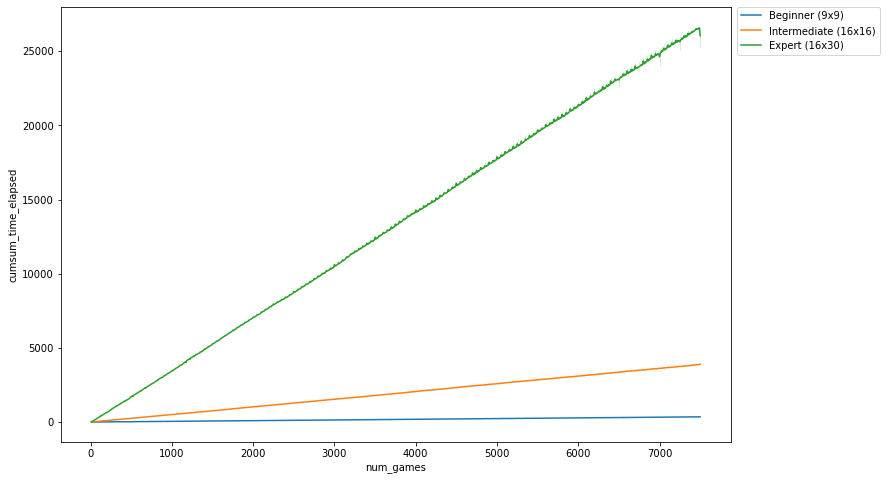

In [184]:
ax = sns.lineplot(x='num_games', y='cumsum_time_elapsed', hue='difficulty', data=df)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

# plt.legend(loc='upper left')
plt.show()

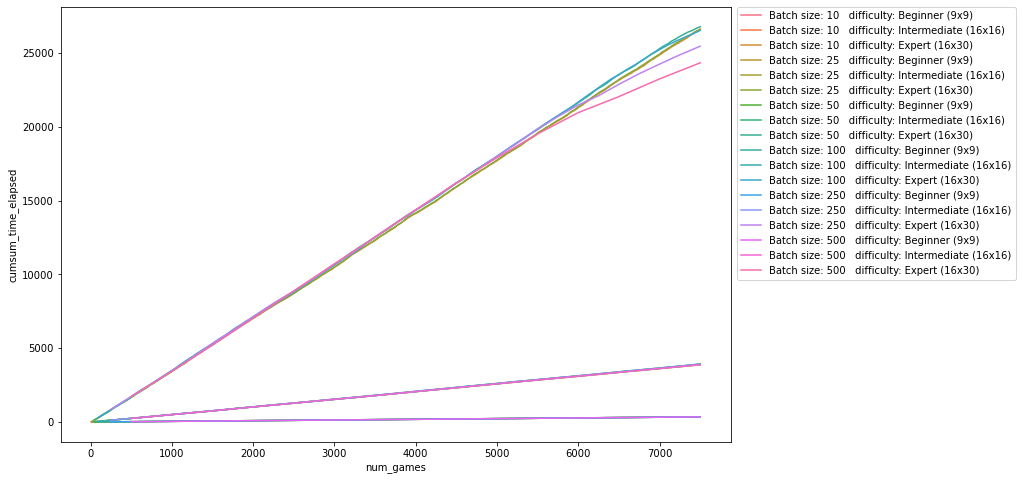

In [185]:
ax = sns.lineplot(x='num_games', y='cumsum_time_elapsed', hue='group', data=df)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

# plt.legend(loc='upper left')
plt.show()

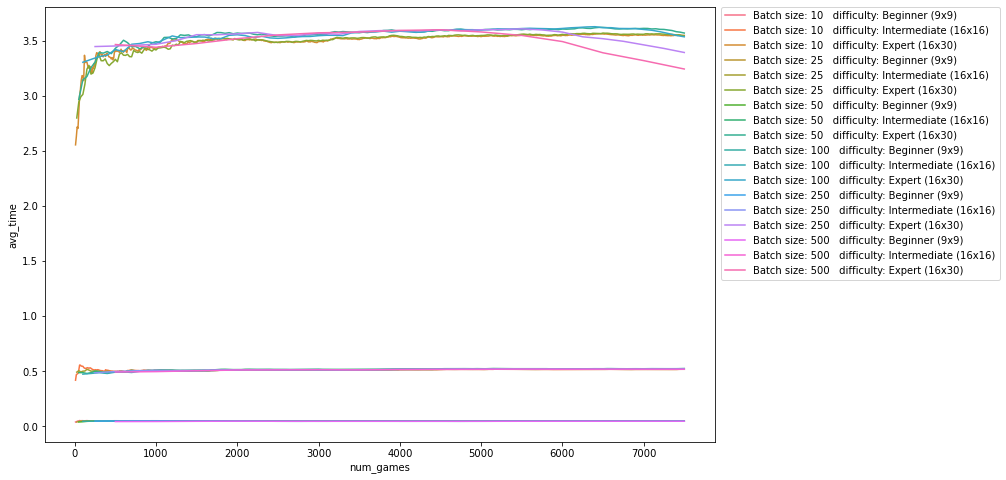

In [190]:
ax = sns.lineplot(x='num_games', y='avg_time', hue='group', data=df)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

# plt.legend(loc='upper left')
plt.show()

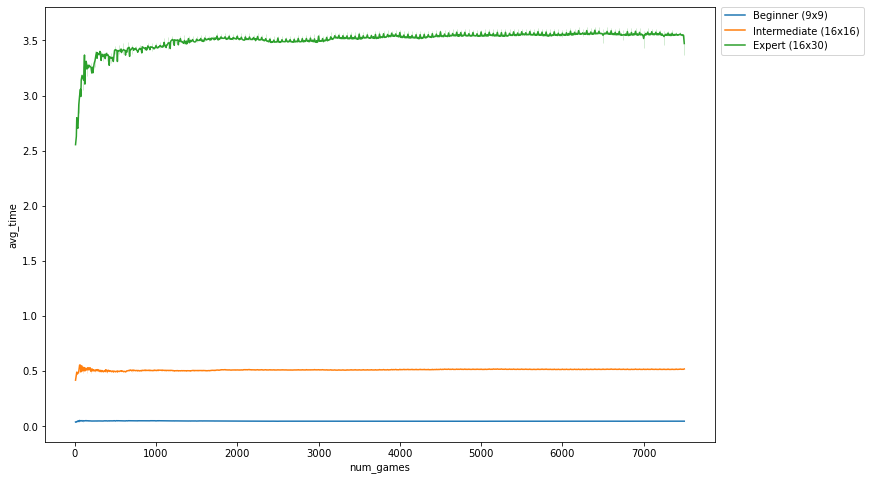

In [191]:
ax = sns.lineplot(x='num_games', y='avg_time', hue='difficulty', data=df)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

# plt.legend(loc='upper left')
plt.show()

In [193]:
expert_difficulty = 'Expert (16x30)'
expert_df = df[df['difficulty'] == 'Expert (16x30)']

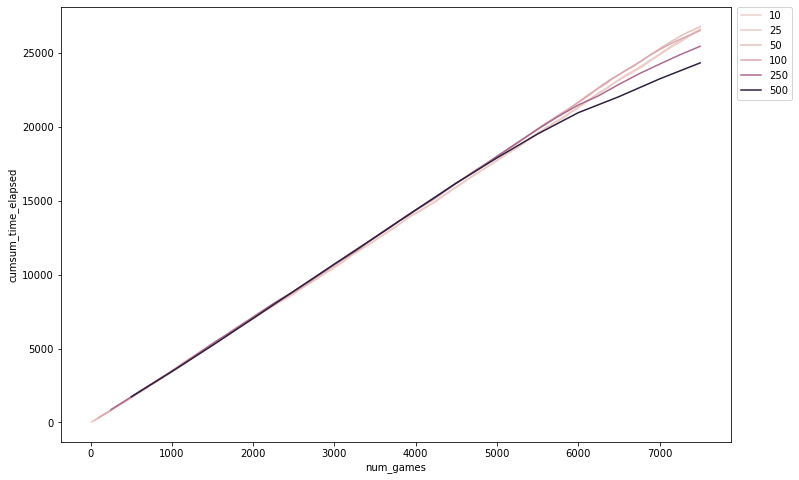

In [197]:
ax = sns.lineplot(x='num_games', y='cumsum_time_elapsed', hue='batch_size', data=expert_df)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

# plt.legend(loc='upper left')
plt.show()

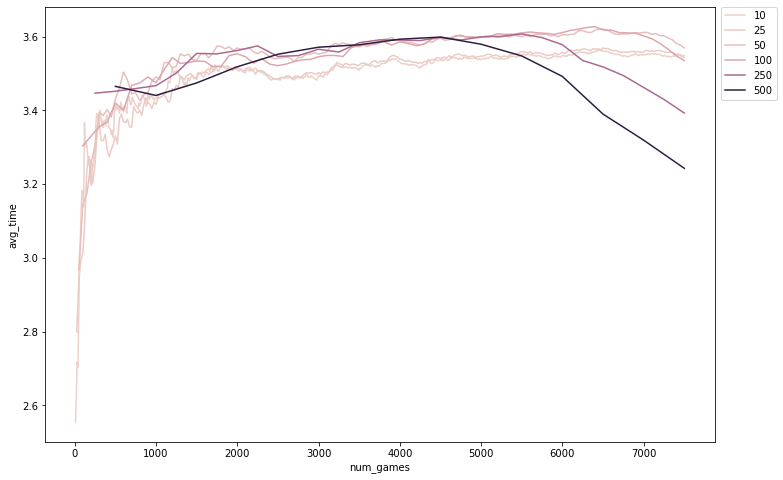

In [195]:
ax = sns.lineplot(x='num_games', y='avg_time', hue='batch_size', data=expert_df)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

# plt.legend(loc='upper left')
plt.show()